# Python Panda  
Download from: https://github.com/davidvi/pypanda

In [5]:
from pypanda import Panda
from pypanda import Lioness
from pypanda import AnalyzePanda

import numpy as np
import pandas as pd

import time
import matplotlib.pyplot as plt
from lightning import Lightning
import networkx as nx

%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


##### Run panda

In [6]:
expression = '../ToyData/ToyExpressionData.txt'
motif = '../ToyData/ToyMotifData.txt'
ppi = '../ToyData/ToyPPIData.txt'

Run and time python panda 

In [7]:
python_panda_time = time.time()

p = Panda(expression, motif, ppi, remove_missing=False)

total_python_panda_time = time.time() - python_panda_time
print('total running time: %s seconds' % (total_python_panda_time))

running panda took: 5.66025304794 seconds
total running time: 6.02892303467 seconds


Run and time R panda

In [8]:
%%R -i expression -i motif -i ppi -o r_panda_results -o total_r_panda_time
library(pandaR)
ptm <- proc.time()
mot <- read.table(file = motif, header = FALSE)
expr <- read.table(file = expression, header = FALSE, row.names = 1)
prot <- read.table(file = ppi, header = FALSE)
p = panda(motif = mot, expr = expr, ppi = prot, remove.missing.ppi = TRUE, remove.missing.motif = TRUE, remove.missing.genes = TRUE)
print(proc.time() - ptm)
r_panda_results <- p@regNet
t <- proc.time() - ptm
total_r_panda_time <- t[3]

   user  system elapsed 
 11.631   1.161  12.806 


Run and time c panda

In [9]:
c_panda_time = time.time()

! ~/Tools/panda_c/PANDA_v2 -e '../ToyData/ToyExpressionData.txt' -m '../ToyData/ToyMotifData.txt' -p '../ToyData/ToyPPIData.txt'

c_total_panda_time = time.time() - c_panda_time
print('total running time: %s seconds' % (c_total_panda_time))

Reading in data.  Note that the code only allocates space for up to 1000 Regulators, 20000 Target Genes, and 500 expression conditions.  If you have more than this you may need to alter the code to avoid a segfault.
Reading In Expression Data!
Num Unique Genes in Expression File:1000 (1000 total entries).
Reading in Motif Data!
Running PANDA using the following parameters:
alpha=0.100000
Data-Types Being Used include:
Regulation Data
Protein Interaction Data
Expression Data
Reading in Protein Interation Data!

Network Data Stats:
NumRegulators:87, NumGenes:1000, NumConditions:50 (50 used for Network), NumRegulatoryInteractions:14597 (14597 unique)

Learning Network!
Step#0, hamming=0.718965
Step#1, hamming=0.389925
Step#2, hamming=0.402366
Step#3, hamming=0.400519
Step#4, hamming=0.389038
Step#5, hamming=0.370510
Step#6, hamming=0.346812
Step#7, hamming=0.319722
Step#8, hamming=0.290806
Step#9, hamming=0.261407
Step#10, hamming=0.232567
Step#11, hamming=0.205049
Step#12, hamming=0.1793

Run and time matlab panda

In [10]:
matlab_panda_time = time.time()

! /Applications/MATLAB_R2015b.app/bin/matlab -nojvm -nodisplay -nosplash -r RunPANDA

total_panda_matlab_time = time.time() - matlab_panda_time
print('total running time: %s seconds' % (total_panda_matlab_time))

=
                            < M A T L A B (R) >
                  Copyright 1984-2015 The MathWorks, Inc.
                   R2015b (8.6.0.267246) 64-bit (maci64)
                              August 20, 2015

 
For online documentation, see http://www.mathworks.com/support
For product information, visit www.mathworks.com.
 

	Student License -- for use by students to meet course requirements
	and perform academic research at degree granting institutions only.

Reading in data!
Running PANDA on 1000 Genes and 87 TFs took 1.779932 seconds!
Elapsed time is 4.474182 seconds.
>total running time: 8.69571089745 seconds


##### Run lioness

Run and time python lioness

In [11]:
python_lioness_time = time.time()

l = Lioness(p)

total_lioness_panda_time = time.time() - python_lioness_time
print('total running time: %s seconds' % (total_lioness_panda_time))

running panda took: 6.0798368454 seconds
running panda took: 5.97938084602 seconds
running panda took: 5.71362781525 seconds
running panda took: 5.84570503235 seconds
running panda took: 6.17608189583 seconds
running panda took: 6.17866492271 seconds
running panda took: 6.12566494942 seconds
running panda took: 5.68770503998 seconds
running panda took: 5.68084597588 seconds
running panda took: 6.26386809349 seconds
running panda took: 6.04214096069 seconds
running panda took: 5.8765501976 seconds
running panda took: 5.71562409401 seconds
running panda took: 5.87833690643 seconds
running panda took: 5.59116601944 seconds
running panda took: 5.55571508408 seconds
running panda took: 5.57664299011 seconds
running panda took: 5.57313895226 seconds
running panda took: 5.52792692184 seconds
running panda took: 5.52675080299 seconds
running panda took: 5.51330709457 seconds
running panda took: 5.56113600731 seconds
running panda took: 5.51418113708 seconds
running panda took: 5.52996110916 se

In [12]:
l.save_lioness_results(file = 'toy_Lioness.txt')

Run and time matlab lioness

In [13]:
matlab_lioness_time = time.time()

! /Applications/MATLAB_R2015b.app/bin/matlab -nojvm -nodisplay -nosplash -r RunLIONESS

total_lioness_matlab_time = time.time() - matlab_lioness_time
print('total running time: %s seconds' % (total_lioness_matlab_time))

=
                            < M A T L A B (R) >
                  Copyright 1984-2015 The MathWorks, Inc.
                   R2015b (8.6.0.267246) 64-bit (maci64)
                              August 20, 2015

 
For online documentation, see http://www.mathworks.com/support
For product information, visit www.mathworks.com.
 

	Student License -- for use by students to meet course requirements
	and perform academic research at degree granting institutions only.

Reading in data!
Running PANDA on 1000 Genes and 87 TFs took 1.710175 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.735286 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.729832 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.732173 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.713321 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.706339 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.711098 seconds!
Running PANDA on 1000 Genes and 87 TFs took 1.733539 seconds!
Running PANDA on 1

##### Summary runtimes


panda

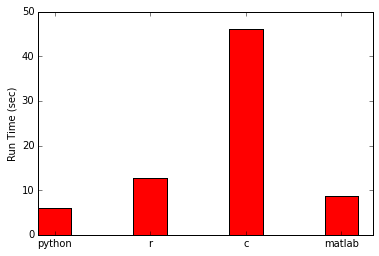

In [14]:
panda_run_times = (total_python_panda_time, total_r_panda_time[0], c_total_panda_time, total_panda_matlab_time)
panda_labels = ('python', 'r', 'c', 'matlab')
ind = np.arange(4)
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(ind, panda_run_times, width, color='r')
ax.set_ylabel('Run Time (sec)')
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(panda_labels)
plt.show()

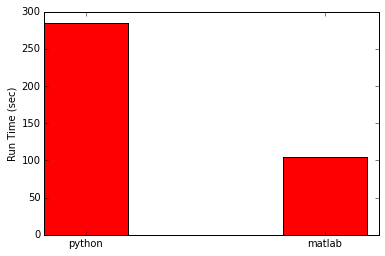

In [15]:
lioness_run_times = (total_lioness_panda_time, total_lioness_matlab_time)
lioness_labels = ('python', 'matlab')
ind = np.arange(2)
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(ind, lioness_run_times, width, color='r')
ax.set_ylabel('Run Time (sec)')
ax.set_xticks(ind+(width/2))
ax.set_xticklabels(lioness_labels)
plt.show()

##### Features

In [16]:
panda_indegree = p.return_panda_indegree()
panda_indegree.head()

,force
gene,
41157,1.139713
AACSL,-5.090725
AAK1,-10.923515
ABCA17P,-8.919393
ABCB8,9.091765


In [17]:
panda_outdegree = p.return_panda_outdegree()
panda_outdegree.head()

,force
tf,
AHR,1030.068405
AR,-731.315760
ARID3A,1274.524235
ARNT,1590.039789
BRCA1,833.289410


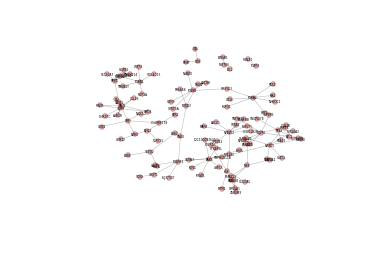

In [19]:
a = AnalyzePanda(p)
a.top_network_plot()